---
title: Unpacking PCA
teaching: 45
exercises: 2
keypoints:
- "PCA transforms your original data by projecting it into new axes"
- "primary components are orthogonal vectors through your data that explain the most variability"
objectives:
- "explain the overall process of PCA"
- "explain the result of a PCA operation"
- "define a primary component"
- "define dimensionality reduction"
- "explain how PCA can be used as a dimensionality reduction technique"
questions:
- "What is the intuition behind how PCA works?"
---

# PCA part 2

# What Just Happened !?

## Intuition: 

#### PCA is a way to rotate the *axes* of your dataset around the *data* so that the axes line up with the *directions of the greatest variation* through the data.



# 2d PCA example - get orientation/intuition.

1. show two variables
1. show PCA result
1. intuition is rotated axes
1. each new axis is a % of other axes now.
1. you can scale that to n dimensions.

keep detail of PCA minimized below - keep them in here. those 5 steps won't build extra intuition though.

### relationship between two variables x and y

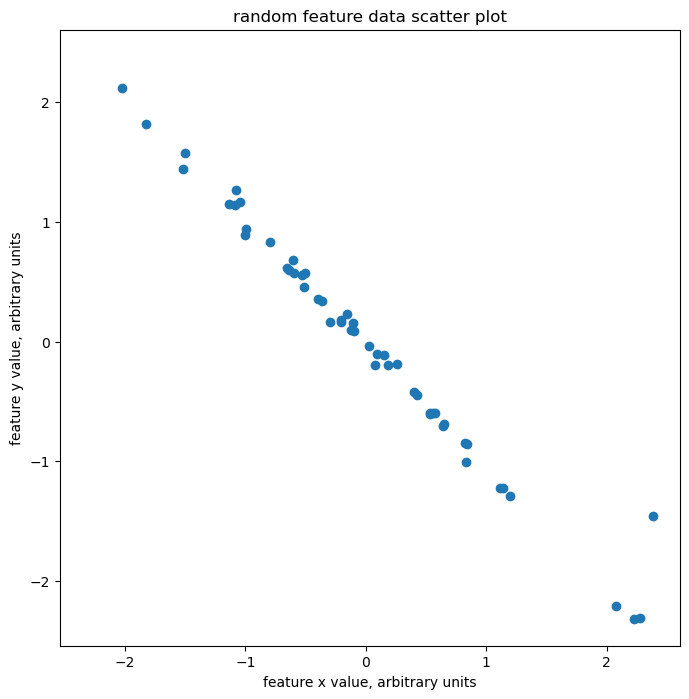

In [1]:
# Here is a random data feature
from helper_functions import create_feature_scatter_plot
feature_ax, features, axlims = create_feature_scatter_plot(random_state=13)

### PCA of those two variables 

In [2]:
from sklearn.decomposition import PCA
# instantiate PCA transform
p = PCA(n_components=2)  

# perform PCA and re-project data 
features_pca = p.fit_transform(features)

### plot PCA result

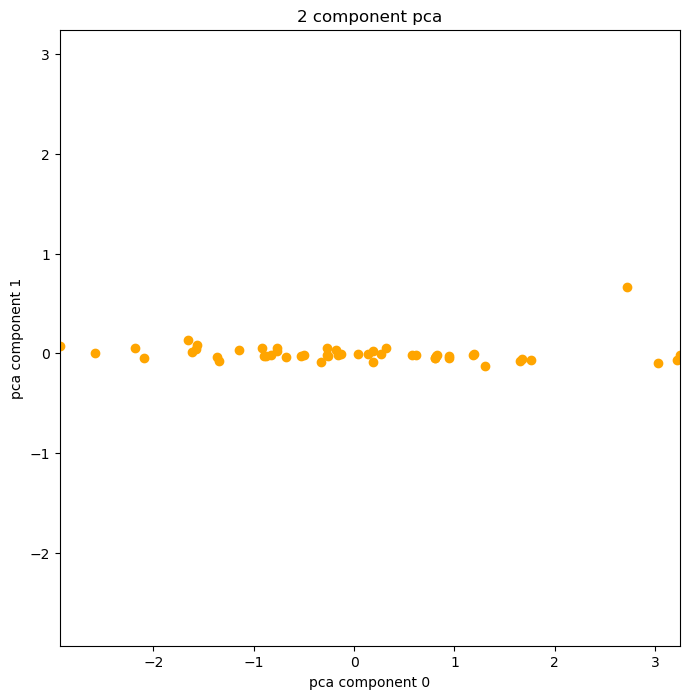

In [3]:
import matplotlib.pyplot as plt
from helper_functions import plot_pca_features
fig, ax, (ax_min, ax_max) = plot_pca_features(features_pca)
plt.show()


# original and PCA result comparison

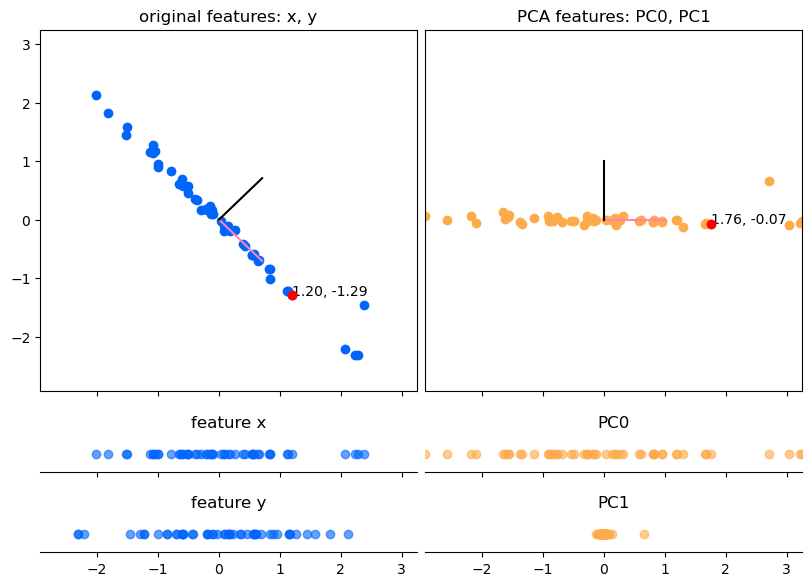

In [4]:
from helper_functions import plot_pca_feature_comparison

point_to_highlight=10
plot_pca_feature_comparison(features, features_pca, ax_max, ax_min, p, point_to_highlight)
plt.show()


# The process of PCA is analagous to walking around your data and looking at it from a new angle

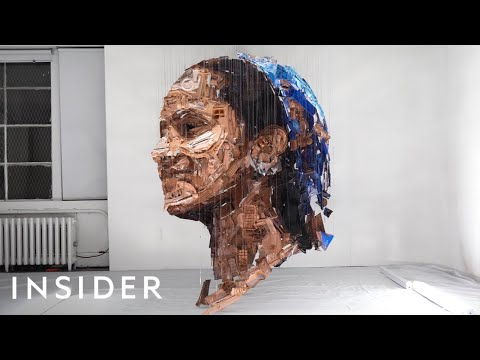

In [5]:
from IPython.display import YouTubeVideo
YouTubeVideo("BorcaCtjmog")

# 3d data example

https://setosa.io/ev/principal-component-analysis/

## this rotation of the axes, mean that new pca axes are made up of *proportions* of the old axes

## what are those proportions? 
### The pca "components_" property, or the eigenvectors of each primary component

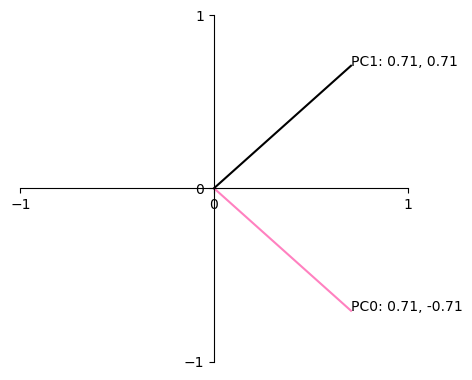

In [6]:
from helper_functions import show_pcs_on_unit_axes

show_pcs_on_unit_axes(p)
plt.show()
    

In [7]:
for i, pc in enumerate(p.components_):
    print(f"PC{i}: {pc}")
    

PC0: [ 0.70710678 -0.70710678]
PC1: [0.70710678 0.70710678]


## demonstrate transform of one point from original feature space to PC-space

In [8]:
fmt_str = "{:.2f}, {:.2f}"
print("START in feature space:")
print(fmt_str.format(features[point_to_highlight,0],features[point_to_highlight,1]))
print()
print("END: in pca space:")
print(fmt_str.format(features_pca[point_to_highlight,0], features_pca[point_to_highlight,1]))


START in feature space:
1.20, -1.29

END: in pca space:
1.76, -0.07


### step 1 scale feature space data

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit(features).transform(features)

print("scaled feature space:")
print("{:.2f}, {:.2f}".format(
    features_scaled[point_to_highlight, 0], 
    features_scaled[point_to_highlight, 1])
    )

scaled feature space:
1.20, -1.29


### step 2 get dot product of feature space values and  principle component eigenvectors

In [10]:
# use both x and y coords of original point here as new pc0-coord is combination of both axes!
print("{:.2f}".format( 
    # first dimension of example point * first dimension of PC0 eigenvector
    features_scaled[point_to_highlight, 0] * p.components_[0,0] 
    +
    # second dimension of example point * second dimension of PC0 eigenvector
    features_scaled[point_to_highlight, 1] * p.components_[0,1]
    )
)

1.76


In [11]:
# Again: use both x and y coords of original point here as new pc1-coord is combination of both axes!
print("{:.2f}".format( 
    # first dimension of example point * first dimension of PC1 eigenvector
    features_scaled[point_to_highlight, 0] * p.components_[1,0] 
    +
    # first dimension of example point * first dimension of PC1 eigenvector
    features_scaled[point_to_highlight, 1] * p.components_[1,1]
    )
)

-0.07


## this is called a dimensionality REDUCTION technique, because one dimension now explains more of the variability of your data

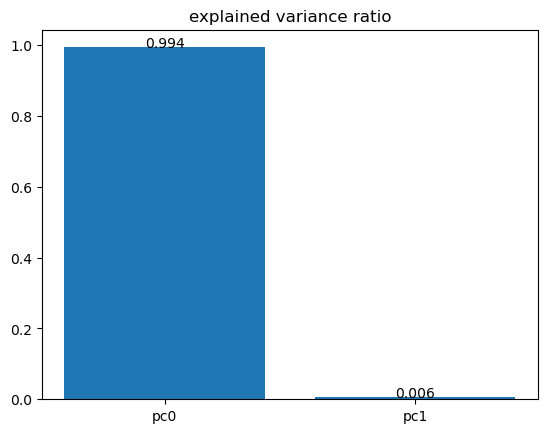

In [12]:
fig, ax = plt.subplots()
x = ["pc0", "pc1"]
ax.bar(x, p.explained_variance_ratio_)
for i in range(len(x)):
    plt.text(x=i, y=p.explained_variance_ratio_[i], 
             s="{:.3f}".format(p.explained_variance_ratio_[i]), 
             ha="center")
ax.set_title("explained variance ratio")
plt.show()

# Explainability

1. PCA'd data results in less explainable models.
2. Each PCA feature is expressed in those new axes/principle components.
3. each of those new axes/priniciple components is made up of proportions of the original feature axes
4. It's hard to explain that: 
    1. PC0 is the main feature in your model, and 
    2. PC0 is (0.71 * feature 0 plus  -0.71 * feature 1)


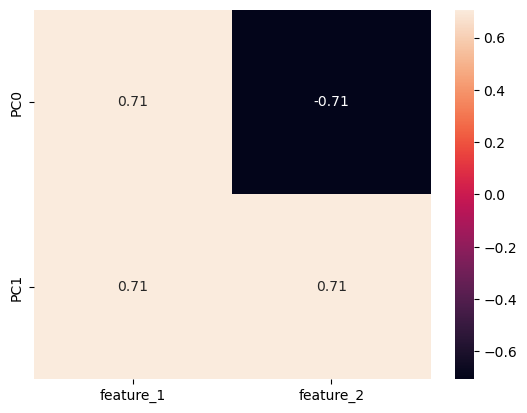

In [17]:
 # show what proportions/coefficients of each original features axis are in the new princpal components:
import seaborn as sns

sns.heatmap(
    data=p.components_, 
    annot=True, 
    yticklabels=["PC0", "PC1"], 
    xticklabels=["feature_1", "feature_2"]
)
plt.show()

# Summary

1. PCA transforms your data
2. transformation is NOT with respect to any target variable. Just the variability of the features
2. PCA'd data has new axes - that are combinations of your original  axes (up to the number of features in your dataset)
3. Those new axes are arranged in order of variance captured from the data
4. those new axes are inherently UNCORRELATED.
5. You can choose a set of the first n axes to maximize variability in your data, while reducing the number of axes
6. PCA is a linear method
7. Just going to mention that non-linear dimensionality reduction is available (t-SNE, UMAP, PACMAP)